## Bootstrap of Fractal Dimension Parameters
- Zachary Neronha
- 29 November 2018

In [28]:
library(R.matlab)
library(repr)
library(boot)

In [6]:
mat = readMat("FractalLoadR.mat")
str(mat$Rmat)
xdata = mat$Rmat[,1]
ydata = mat$Rmat[,2]

 num [1:4516, 1:2] 4 5 5 12 12 11 7 12 5 9 ...


In [17]:
plaw = function(x,a,b){a*x^(b)}

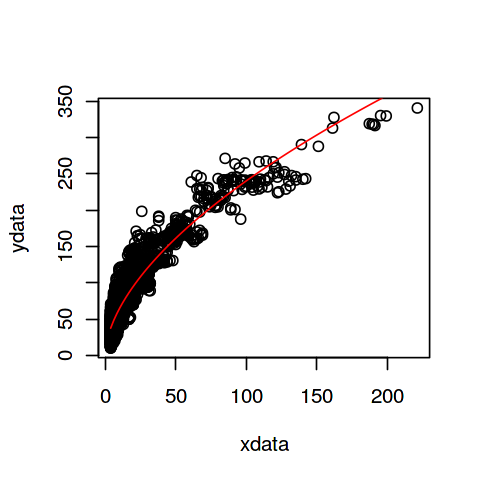

In [23]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(xdata,ydata)
curve(plaw(x,16.98,0.5756),add=TRUE,col="red")

##### Fitting Model Results from MATLAB
     General model Power1:
     f(x) = a*x^b
     Coefficients (with 95% confidence bounds):
       a =       16.98  (16.68, 17.28)
       b =      0.5756  (0.5705, 0.5808)

#### R Non-linear Least Squares Fit

In [32]:
fit = nls(ydata~plaw(xdata,a,b),start=list(a=16,b=0.5))
print(fit)

Nonlinear regression model
  model: ydata ~ plaw(xdata, a, b)
   data: parent.frame()
      a       b 
16.9799  0.5756 
 residual sum-of-squares: 1065402

Number of iterations to convergence: 4 
Achieved convergence tolerance: 5.314e-06


In [68]:
print(names(fit))
sum(residuals(fit)^2)
a = coef(fit)[1]
b = coef(fit)[2]
print(c(a,b))

[1] "m"           "convInfo"    "data"        "call"        "dataClasses"
[6] "control"    


[1] 1065402

         a          b 
16.9799185  0.5756188 


#### Compute R Bootstrap Confidence Intervals for Regression Parameters

In [75]:
Cdata = cbind(xdata,ydata)
print(dim(Cdata))

[1] 4516    2


In [76]:
bs = function(data, indices) {
    ds = data[indices,]
    xs = ds[,1]
    ys = ds[,2]
    fit = nls(ys~plaw(xs,a,b),start=list(a=16,b=0.5))
    SSR = sum(residuals(fit)^2)
    a = coef(fit)[1]
    b = coef(fit)[2]
    return(c(a,b))
} 

In [85]:
results = boot(data=Cdata, statistic=bs, R=10000)

In [86]:
print(results)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Cdata, statistic = bs, R = 10000)


Bootstrap Statistics :
      original        bias    std. error
t1* 16.9799185 -0.0048631173 0.174845751
t2*  0.5756188  0.0001242031 0.003395917


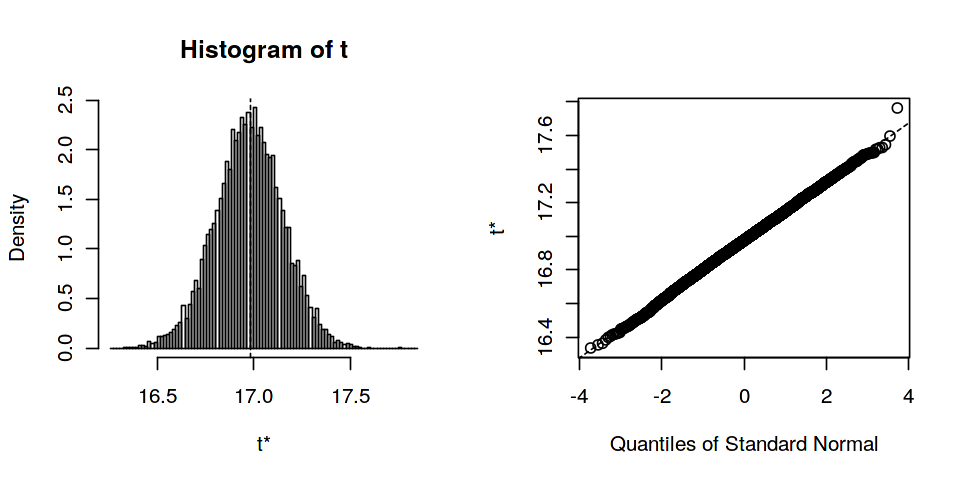

In [87]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot(results,index=1)

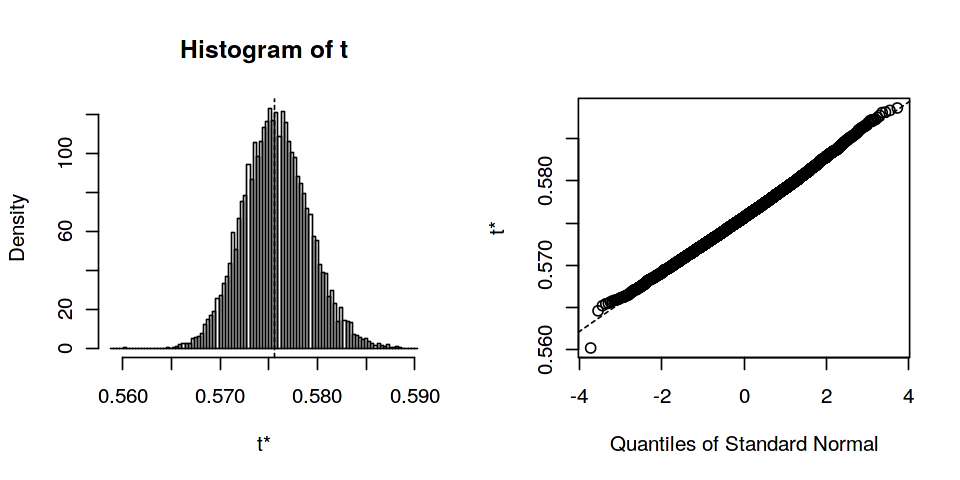

In [88]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot(results,index=2)